In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b=((2*np.pi)/lambda_355)*(0.5e-2)**2
omega0 = 0.5e-2
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : 0.2,            # [m] confocal parameter
            'energy' : 15e-3,       # [J] single pulse energy original
            'duration' : 7e-9,
            'PXe':25,
            'dk': -1}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48, #value from fit 'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}   #value from fit: 1.5e-35

zstart = -0.2
zstop =0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 10000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [4]:
f_to_b(0.5e-2,20e-2),f_to_b(0.5e-2,100e-2)

(0.0003616003262101672, 0.009040185458482704)

In [ ]:
dksamples = 50
dkrange = (0.01,40)# confocal perameter [m] (corresponds to f=20cm to f=100cm)
dk = np.linspace(dkrange[0], dkrange[1], dksamples)
dkscan = xr.DataArray(dk,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})

single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

dk_scan = scan_builder(single_func, params_WA, [dkscan])

In [6]:
scanned_WA = dk_scan(params=params_WA)

0.0


d:\118_Project\118-Project\Functions.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  return omega0 * np.sqrt(1+(z/zR)**2)
d:\118_Project\118-Project\Functions.py:54: RuntimeWarning: invalid value encountered in scalar multiply
  return omega0 * np.sqrt(1+(z/zR)**2)
d:\118_Project\118-Project\Functions.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  return energy / ((np.pi * omega0**2) * duration)
d:\118_Project\118-Project\Functions.py:173: RuntimeWarning: divide by zero encountered in scalar divide
  * np.cos((dk*z)-2*np.arctan2(2*z/b,1) + evalPhi3(z,z0,params))\
d:\118_Project\118-Project\Functions.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  Ref1 = lambda x: (1/(1+ (2*x/b)**2)**2) * (1-(2*x/b)**2) #times cos(dk*x)
d:\118_Project\118-Project\Functions.py:95: RuntimeWarning: invalid value encountered in scalar multiply
  Ref1 = lambda x: (1/(1+ (2*x/b)**2)**2) * (1-(2*x/b)**2) #times cos(dk*x)
d:\118_Project\118-Project

ValueError: array must not contain infs or NaNs

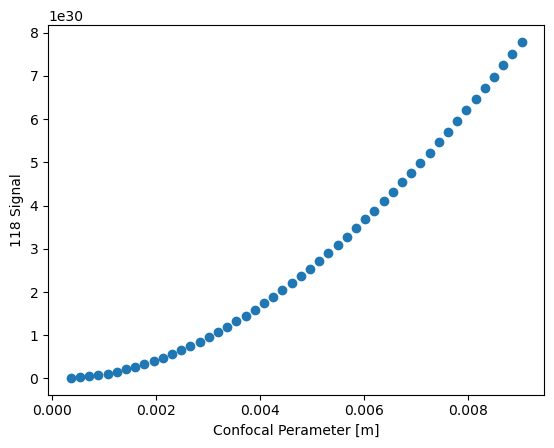

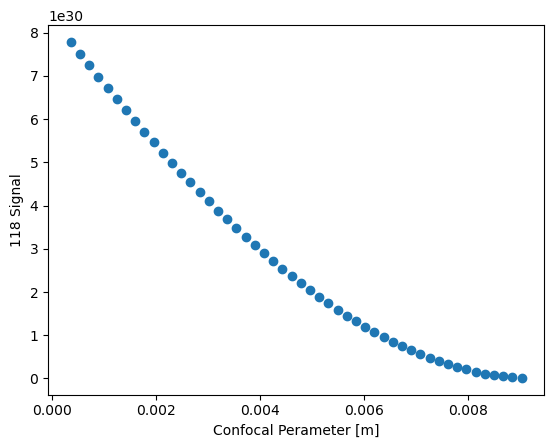

Text(0, 0.5, 'Peak 118 Signal')

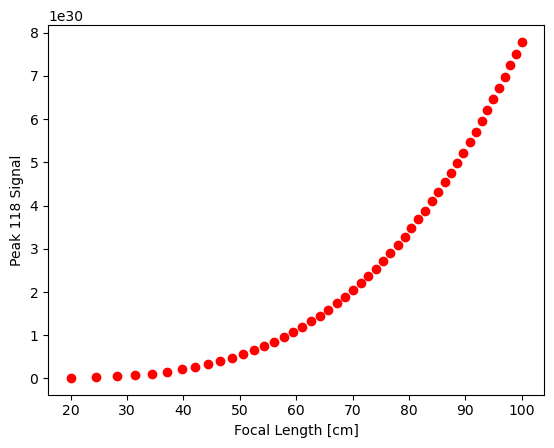

In [ ]:
plt.scatter(scanned_WA.b.data,scanned_WA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.show()

bPlot = np.linspace(scanned_WA.b.data[-1],scanned_WA.b.data[0])

plt.scatter(bPlot,scanned_WA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.show()


f= b_to_f(0.5e-2,bs)*10**2 #convert to focal length in cm
plt.scatter(f,scanned_WA.data[:,0],color = 'red')
plt.xlabel('Focal Length [cm]')
plt.ylabel('Peak 118 Signal')

#plt.plot(f,scanned_WA.data[:,0])




In [ ]:
opt_b_index = np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0]
print('optimal b value: ',scanned_WA.b.data[opt_b_index])


optimal b value:  0.009040185458482704


In [ ]:


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan_NA = scan_builder(single_func, params_NA, [bscan])

In [ ]:
scanned_NA = B_scan_NA(params=params_NA)

0.0003616003262101672
0.0005387143085014434
0.0007158282907927197
0.0008929422730839959
0.0010700562553752724
0.0012471702376665485
0.0014242842199578246
0.0016013982022491011


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.0017785121845403772
0.0019556261668316538
0.00213274014912293
0.002309854131414206
0.002486968113705482
0.0026640820959967586


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.0028411960782880347


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.0030183100605793113
0.0031954240428705874


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.0033725380251618635


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.00354965200745314


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.003726765989744416


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.0039038799720356927


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.004080993954326969


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.004258107936618245


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.004435221918909522


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.0046123359012007975


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.004789449883492074


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.004966563865783351


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.005143677848074627


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.005320791830365903


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.005497905812657179
0.005675019794948456


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.005852133777239732


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.006029247759531008


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.006206361741822285


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.00638347572411356


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.006560589706404837
0.006737703688696113


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.006914817670987389


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.007091931653278666
0.007269045635569942
0.007446159617861219
0.007623273600152494
0.007800387582443771


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.007977501564735047
0.008154615547026322


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.008331729529317598


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.008508843511608875
0.008685957493900151
0.008863071476191427


d:\118_Project\118-Project\Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.009040185458482704


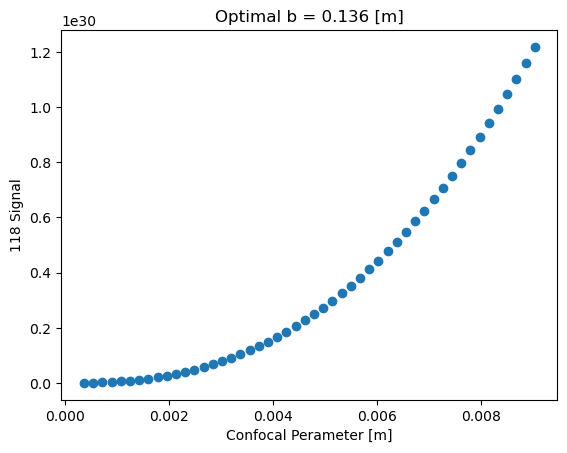

Text(0, 0.5, 'Peak 118 Signal')

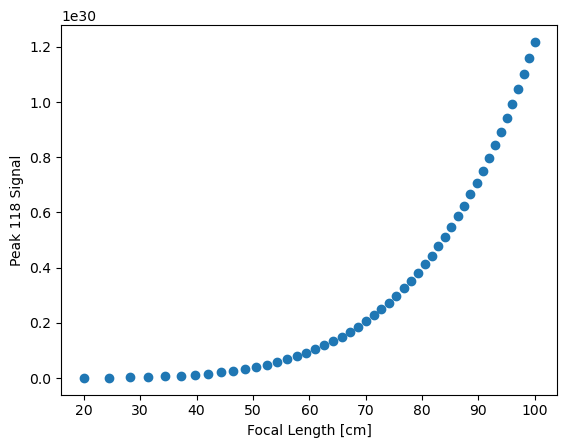

In [ ]:
plt.scatter(scanned_NA.b.data,scanned_NA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.136 [m]')
plt.show()

f= b_to_f(0.5e-2,bs)*10**2 #convert to focal length in cm

plt.scatter(f,scanned_NA.data[:,0])
plt.xlabel('Focal Length [cm]')
plt.ylabel('Peak 118 Signal')

#plt.plot(f,scanned_WA.data[:,0])



In [ ]:
opt_b_index_NA = np.where(scanned_NA.data[:,0] == max(scanned_NA.data[:,0]))[0][0]
print(scanned_NA.b.data[opt_b_index_NA])

0.009040185458482704


In [ ]:
omega_initial = 0.5e-2
b_final = 0.4

b_to_f(omega_initial,0.002260011735083854)

0.4999999999990347

In [ ]:
k_355 = 2*np.pi/lambda_355
b_yag = k_355*omega_initial**2
print(b_yag)

442.47783853377365


In [ ]:
(2*omega_initial/b_yag)**2

5.107600867410249e-10

In [ ]:
zR_yag = b_yag/2
q_yag = complex(0,zR_yag)
params = {'lambda':lambda_355}
q_lens1=thin_lens(q_yag,100e-2)
print('AFTER THIN LENS:')
q_to_params(q_lens1,params)
q_focus1=free_space(q_lens1,0.9999795700139232)
print('AT FOCUS:')
q_to_params(q_focus1,params)


AFTER THIN LENS:
positon relative to focus:  -0.9999795700139232 [m]
beam spot size:  0.005 [m]
AT FOCUS:
positon relative to focus:  0.0 [m]
beam spot size:  2.2599771059007745e-05 [m]


In [ ]:
omega0_lens1 = 2.2599771059007745e-05

b_lens1 = k_355*omega0_lens1**2
print(b_lens1)

0.009039816080529837


In [ ]:
b_to_f(2.2599771059007745e-05,0.4)*100

1.1227886160586296

In [ ]:
b_to_f(0.5e-2,0.4)

6.648898856980159

In [ ]:
f_to_b(2.2599771059007745e-05,1.2e-2)

0.5128420274853751